In [4]:
!pip install opencv-python
!pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=c04754bda2104b315f7f5b4fa038982ac0ead387794a9255d85b489d6769487d
  Stored in directory: c:\users\a0970\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten,Dense
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.preprocessing import image
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from keras.models import Model

In [6]:
def load_labels(filepath):
    with open(filepath, 'r') as f:
        return [line.strip() for line in f]

In [7]:
# load images and labels
def load_images(image_files):
    img_list = []
    images = [cv2.imread('./image/file/{}'.format(p),0) for p in image_files]
    images = np.array(images)
    for image in images:
        img_list.append(cv2.resize(image,(100,100),interpolation=cv2.INTER_CUBIC))
    get_image_class = lambda path: path.split('_')[0]
    labels = list(map(get_image_class, image_files))
    return np.array(img_list), labels

In [8]:
train_files = load_labels('./image/train.txt')
train_images, train_labels = load_images(train_files)
train_images = train_images/255.
label_dict = {label: idx
              for idx, label in enumerate(sorted(set(train_labels)))}
y_train = np.array([label_dict[label] for label in train_labels])

In [9]:
train_images = train_images.reshape((-1,1,100,100))
y_train = y_train.reshape(-1,1)

train_images, y_train = shuffle(train_images, y_train, random_state=0)
train_images.shape,y_train.shape

((1800, 1, 100, 100), (1800, 1))

In [10]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

In [11]:
onehot_encoder = OneHotEncoder(sparse=True)
y_train = onehot_encoder.fit_transform(y_train)
train_images.shape,y_train.shape

((1800, 1, 100, 100), (1800, 6))

In [28]:
model = Sequential()
model.add(Convolution2D(
    batch_input_shape=(None,1, 100, 100), 
    filters=32,
    kernel_size=5,
    strides=1,
    name="conv_1",
    padding='same',
    activation='relu'
))

model.add(MaxPooling2D(
    pool_size=2,
    strides=2,
    name="max_1",
    padding='same', 
    
))
model.add(Convolution2D(filters=64, 
                        kernel_size=5, 
                        strides=1,
                        name="conv_2", 
                        padding='same',
                        activation='relu'))
model.add(MaxPooling2D(
    pool_size=2,
    strides=2,
    name="max_2",
    padding='same',  
))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(6)) 
model.add(Activation('softmax'))

Training ------------

Train on 1440 samples, validate on 360 samples
Epoch 1/20
1440/1440 [==============================] - 2s 2ms/step - loss: 1.7632 - accuracy: 0.2049 - val_loss: 1.7150 - val_accuracy: 0.3000
Epoch 2/20
1440/1440 [==============================] - 2s 1ms/step - loss: 1.6764 - accuracy: 0.2924 - val_loss: 1.5715 - val_accuracy: 0.3306
Epoch 3/20
1440/1440 [==============================] - 2s 1ms/step - loss: 1.5349 - accuracy: 0.3340 - val_loss: 1.4374 - val_accuracy: 0.4083
Epoch 4/20
1440/1440 [==============================] - 2s 1ms/step - loss: 1.4077 - accuracy: 0.3715 - val_loss: 1.3717 - val_accuracy: 0.4222
Epoch 5/20
1440/1440 [==============================] - 2s 1ms/step - loss: 1.3129 - accuracy: 0.4222 - val_loss: 1.2513 - val_accuracy: 0.4556
Epoch 6/20
1440/1440 [==============================] - 2s 1ms/step - loss: 1.2353 - accuracy: 0.4736 - val_loss: 1.2088 - val_accuracy: 0.5167
Epoch 7/20
1440/1440 [==============================] - 2s 1ms/ste

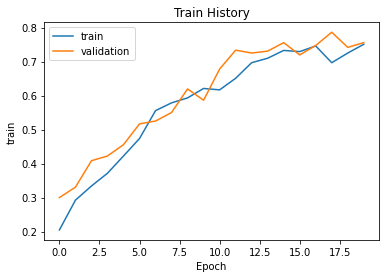

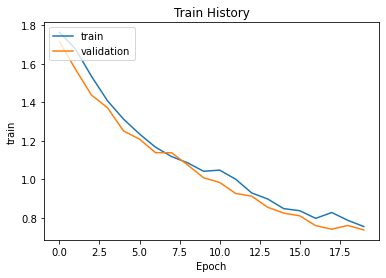

In [29]:
adam = Adam(lr=1e-4)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print('Training ------------')
train_history = model.fit(train_images, y_train, epochs=20, batch_size=64,validation_split=0.2)
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')